In [14]:
%matplotlib inline

In [91]:
import numpy as np
#from mayavi import mlab
from vtk_rw import read_vtk
from ply_rw import read_ply
import seaborn as sns
from plotting import plot_surf_stat_map
from graphs import graph_from_mesh, sorted_path
import matplotlib.pyplot as plt

In [43]:
def make_cluster_cmap(c):
    cmap = np.asarray(sns.color_palette('cubehelix', c-1))
    np.random.shuffle(cmap)
    cmap = np.concatenate((np.array([[0.4,0.4,0.4]]), cmap), axis=0)
    cmap = np.concatenate((cmap, np.ones((c,1))), axis=1)
    cmap_seaborn = [tuple(cmap[i]) for i in range(len(cmap))]

    cmap_255=np.zeros_like(cmap)
    for row in range(cmap.shape[0]):
        cmap_255[row]=[np.floor(i * 255) for i in cmap[row]]
    cmap_255=cmap_255.astype(int)
    
    return cmap_seaborn, cmap_255

In [44]:
mesh_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_d.vtk'
clustering_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/clust/smooth_3/mask_025_5/rh_embed_10_kmeans_10.npy'
embed_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/clust/smooth_3/mask_025_5/rh_embed_10.npy'

In [48]:
v, f, d = read_vtk(mesh_file)
clust = np.load(clustering_file)
embed = np.load(embed_file)[:,0]

In [49]:
vertices = v.astype(np.float64)
faces = f.astype(np.int32)
sulc = np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_sulc.npy')

In [62]:
G=graph_embed(vertices, faces, embed)

In [74]:
def graph_embed(nodes, triangles, embed):
    '''
    Creates a networkx graph from a mesh
    '''
    
    import numpy as np
    import networkx as nx
    
    # initiate empty graph
    G=nx.Graph()
    
    # add node indices
    G.add_nodes_from(range(len(nodes)))
    
    # add edges
    G.add_edges_from(triangles[:,[0,1]])
    G.add_edges_from(triangles[:,[0,2]])
    G.add_edges_from(triangles[:,[1,2]])
    
    # caution! this adds a key 'coords' to the node
    # which will also be picked up by .neighbors methods
    
    for e in G.edges_iter():
        #G[e[0]][e[1]]['length']=np.linalg.norm(nodes[e[0]]-nodes[e[1]])
        G[e[0]][e[1]]=float(embed[e[1]]-embed[e[0]])/np.linalg.norm(nodes[e[0]]-nodes[e[1]])
        G[e[1]][e[0]]=float(embed[e[0]]-embed[e[1]])/np.linalg.norm(nodes[e[0]]-nodes[e[1]])

    return G

In [87]:
start = 45678
embed[start]

0.020235443747862052

In [86]:
path[0]

45678

In [ ]:
start = 45678
direction = 'up'


path = [start]
local_minimum = False
if direction == 'up':
    while len(path)<100:
        neighbours = np.asarray(G[path[-1]].items())
        loc = np.argmax(neighbours[:,1])
        nextstep = int(neighbours[loc][0])

        if not nextstep in path:
            path.append(nextstep)
        else:
            while nextstep in path:
                if len(neighbours) ==0:
                    print 'no possible next steps'
                    break
                neighbours = np.delete(neighbours, loc, axis=0)
                loc = np.argmax(neighbours[:,1])
                nextstep = int(neighbours[loc][0])
                

In [149]:
neighbours = np.asarray(G[path[-1]].items())

In [150]:
neighbours

array([[  4.25930000e+04,  -1.29090610e-04],
       [  4.25940000e+04,  -3.63488767e-04],
       [  4.25950000e+04,   1.96044245e-04],
       [  4.25960000e+04,  -6.41651345e-05],
       [  4.49610000e+04,  -5.74909433e-04],
       [  4.33760000e+04,  -7.56254387e-04],
       [  4.37680000e+04,  -1.16727364e-03]])

In [151]:
np.delete(neighbours, 2, axis=0)

array([[  4.25930000e+04,  -1.29090610e-04],
       [  4.25940000e+04,  -3.63488767e-04],
       [  4.25960000e+04,  -6.41651345e-05],
       [  4.49610000e+04,  -5.74909433e-04],
       [  4.33760000e+04,  -7.56254387e-04],
       [  4.37680000e+04,  -1.16727364e-03]])

In [152]:
neighbours

array([[  4.25930000e+04,  -1.29090610e-04],
       [  4.25940000e+04,  -3.63488767e-04],
       [  4.25950000e+04,   1.96044245e-04],
       [  4.25960000e+04,  -6.41651345e-05],
       [  4.49610000e+04,  -5.74909433e-04],
       [  4.33760000e+04,  -7.56254387e-04],
       [  4.37680000e+04,  -1.16727364e-03]])

### Path 1

In [22]:
G=graph_from_mesh(vertices, faces, edge_length=True)

In [73]:
unsorted_path = np.loadtxt('/scr/ilz3/myelinconnect/all_data_on_simple_surf/path/rh_path1.1D.roi', dtype='int64')[:,0]
path = sorted_path(G, unsorted_path)

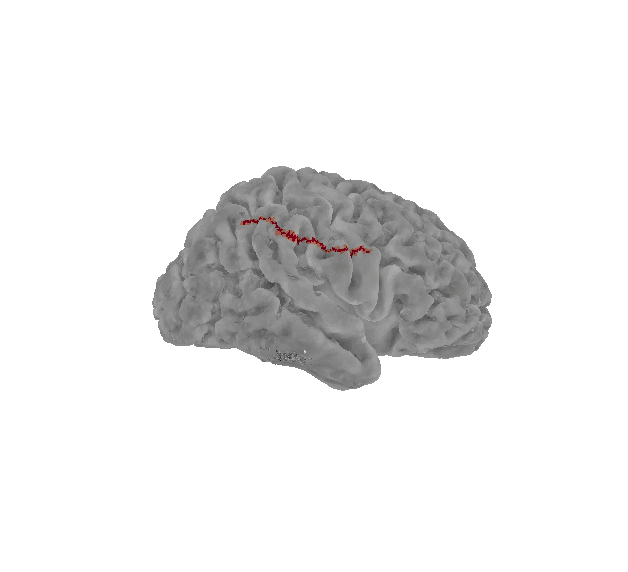

In [29]:
sns.set_style('white')
pathbrain = np.zeros_like(vertices[:,0])
pathbrain[path] = 1
plot=plot_surf_stat_map(vertices, faces, stat_map=pathbrain, bg_map=sulc, bg_on_stat=True, elev=180,azim=0, figsize=(11,10))

### Path 2

In [85]:
unsorted_path = np.loadtxt('/scr/ilz3/myelinconnect/all_data_on_simple_surf/path/rh_path2.1D.roi', dtype='int64')[:,0]
path = sorted_path(G, unsorted_path)

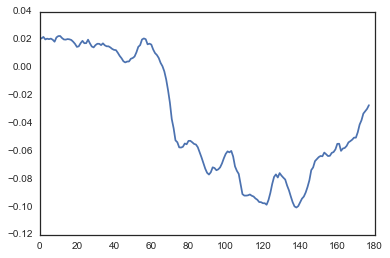

In [92]:
plt.plot(embed[path])

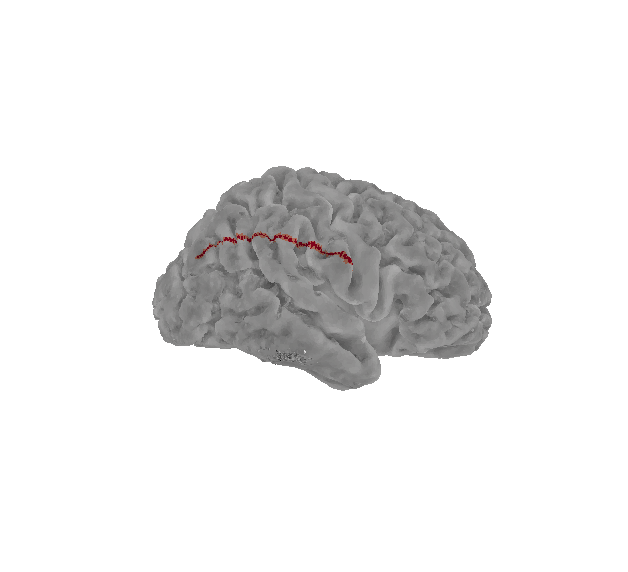

In [33]:
sns.set_style('white')
pathbrain = np.zeros_like(vertices[:,0])
pathbrain[path] = 1
plot=plot_surf_stat_map(vertices, faces, stat_map=pathbrain, bg_map=sulc, bg_on_stat=True, elev=180,azim=0, figsize=(11,10))

### Path 3

In [38]:
unsorted_path = np.loadtxt('/scr/ilz3/myelinconnect/all_data_on_simple_surf/path/rh_path3.1D.roi', dtype='int64')[:,0]
path = sorted_path(G, unsorted_path)

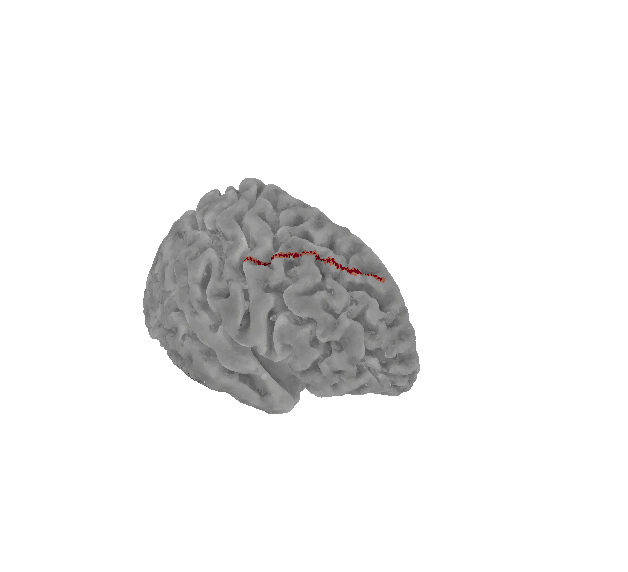

In [41]:
sns.set_style('white')
pathbrain = np.zeros_like(vertices[:,0])
pathbrain[path] = 1
plot=plot_surf_stat_map(vertices, faces, stat_map=pathbrain, bg_map=sulc, bg_on_stat=True, elev=200,azim=-40, figsize=(11,10))

### Path 4

In [34]:
unsorted_path = np.loadtxt('/scr/ilz3/myelinconnect/all_data_on_simple_surf/path/rh_path4_med.1D.roi', dtype='int64')[:,0]
path = sorted_path(G, unsorted_path)

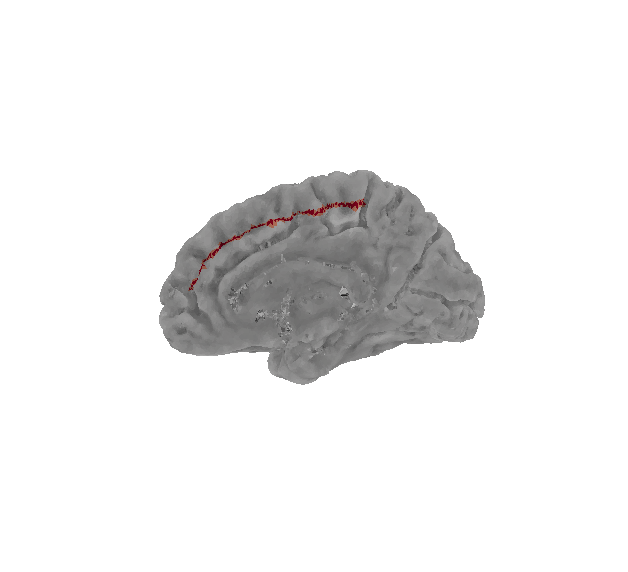

In [35]:
sns.set_style('white')
pathbrain = np.zeros_like(vertices[:,0])
pathbrain[path] = 1
plot=plot_surf_stat_map(vertices, faces, stat_map=pathbrain, bg_map=sulc, bg_on_stat=True, elev=180,azim=180, figsize=(11,10))